Dataset loaded. Shape: (303, 14)
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  
Cleaned dataset shape: (297, 14)


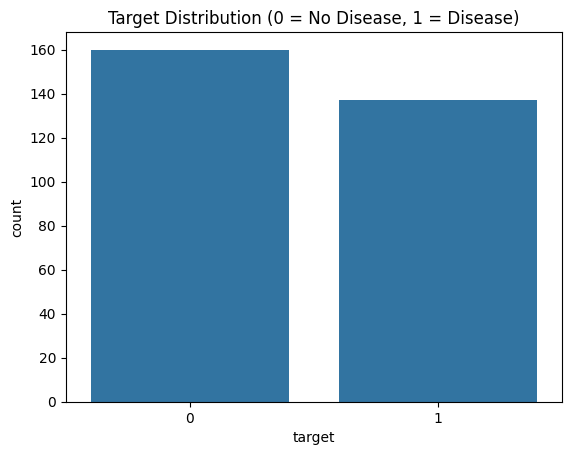

Train shape: (237, 13) Test shape: (60, 13)

Logistic Regression Results:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



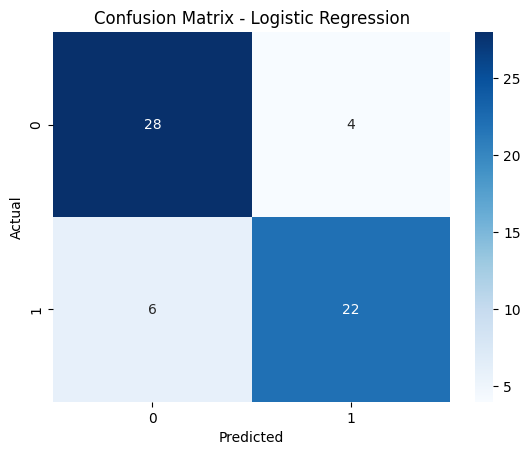


Random Forest Results:
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.88      0.82      0.85        28

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.87      0.87      0.87        60



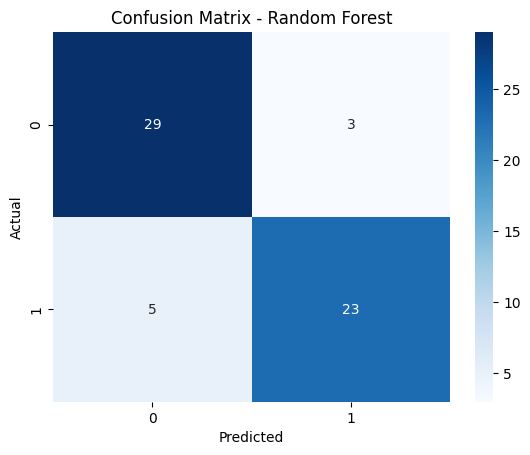


SVM Results:
Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



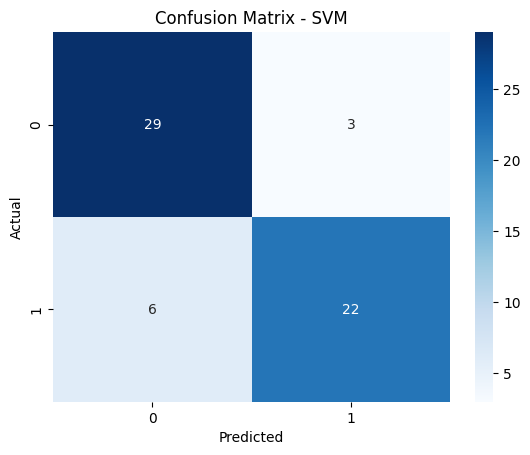


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest Accuracy: 0.85


In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================
# 1. Load Dataset
# ============================

# Unzip dataset
with zipfile.ZipFile("/content/heart+disease.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/heart_disease_data")

# Load Cleveland dataset
file_path = "/content/heart_disease_data/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)

# Add column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]
df.columns = columns

print("Dataset loaded. Shape:", df.shape)
print(df.head())

# ============================
# 2. Data Preprocessing
# ============================

# Replace '?' with NaN and convert to numeric
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)

# Drop rows with NaN values (or could impute)
df = df.dropna()

# Convert target: presence (1-4) → 1 (disease)
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print("Cleaned dataset shape:", df.shape)

# ============================
# 3. Exploratory Data Analysis (EDA)
# ============================

sns.countplot(x="target", data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# ============================
# 4. Train-Test Split
# ============================

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ============================
# 5. Feature Scaling
# ============================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 6. Model Training
# ============================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ============================
# 7. Hyperparameter Tuning (Example with Random Forest)
# ============================

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("\nBest parameters for Random Forest:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)

print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))